1. Import the necessary libraries  
2. Read the data as a data frame  
3. Perform basic EDA which should include the following  and print out your insights at every step. 
a. Shape of the data   b. Data type of each attribute  c. Checking the presence of missing values  
d. 5 point summary of numerical attributes  e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.  
f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’  columns 
g. Checking the presence of outliers in ‘bmi’, ‘age’ and  ‘charges columns  
h. Distribution of categorical columns (include  children)  i. Pair plot that includes all the columns of the data  frame   
4. Answer the following questions with statistical evidence  
a. Do charges of people who smoke differ significantly  from the people who don't?  
b. Does bmi of males differ significantly from that of  females? 
c. Is the proportion of smokers significantly different  in different genders? 
d. Is the distribution of bmi across women with no  children, one child and two children, the same ? 
  

In [38]:
#1 Import the necessary libraries
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [39]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#For the process of label encoding, Import scikit-learn.
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder

In [40]:
#2 Read the data as a data frame
# reading the CSV file into pandas dataframe

ins_df = pd.read_csv(r"C:\Users\Admin\Downloads\insurance.csv")  

Perform basic EDA which should include the following and print out your insights at every step. 
a. Shape of the data b. Data type of each attribute c. Checking the presence of missing values
d. 5 point summary of numerical attributes e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns 
g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

In [41]:
# Check top few records to get a feel of the data structure
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [42]:
ins_df.shape

(1338, 7)

In [43]:
ins_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [44]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [45]:
# Making a list of missing value types
missing_values = ["0", "na", "-"]
st_missing_df = pd.read_csv(r"C:\Users\Admin\Downloads\lab_3\students-data.csv", delimiter = ';', na_values = missing_values)
ins_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [46]:
#Lets analysze the distribution of the dependent column
ins_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


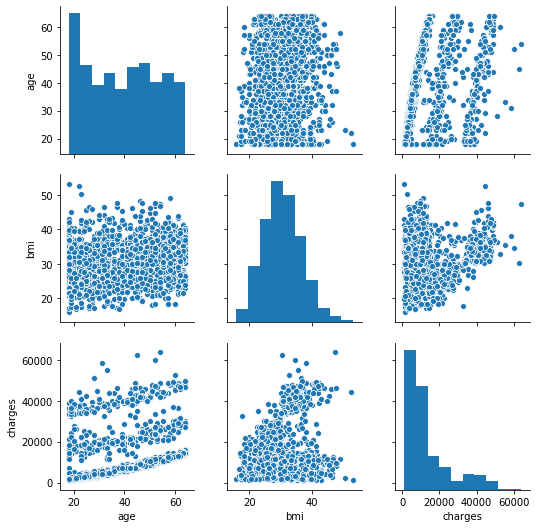

In [47]:
ins_df_attr = ins_df.drop('children', axis=1)

sns.pairplot(ins_df_attr)

In [48]:
ins_df.skew(axis=0, skipna=True)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [49]:
ins_df.corr(method ='pearson') 

##df.corr(method ='kendall')

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


The output dataframe can be interpreted as for any cell, row variable correlation with the column variable is the value of the cell. 
The correlation of a variable with itself is 1. For that reason all the diagonal values are 1.00

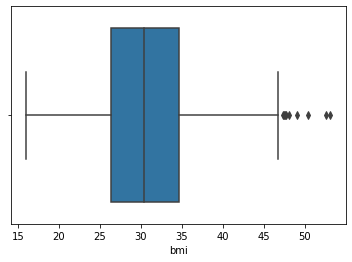

In [50]:
## Finding outliers

sns.boxplot(x=ins_df['bmi'])

Above plot shows 6 points between 47 to 57, 
these are outliers as there are not included in the box of other observation i.e no where near the quartiles.

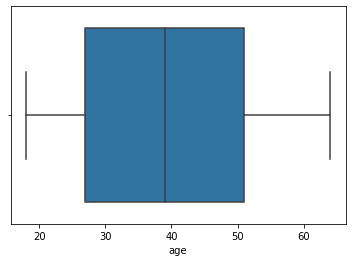

In [51]:

sns.boxplot(x=ins_df['age'])

no outliers

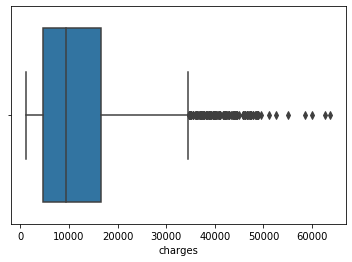

In [54]:
sns.boxplot(x=ins_df['charges'])

MAny points are lying between 35000 qnd 70000. Indicates precense of outliers

Print all the attribute names which are not numerical.

In [55]:
##st_df.select_dtypes(include=['object'])
obj_df = ins_df.select_dtypes(include=['object']).copy()
obj_df.head(10)

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
5,female,no,southeast
6,female,no,southeast
7,female,no,northwest
8,male,no,northeast
9,female,no,northwest


In [56]:
# Find the variance of each numerical independent variable and drop whose variance is less than 1.
ins_df.var()

age         1.974014e+02
bmi         3.718788e+01
children    1.453213e+00
charges     1.466524e+08
dtype: float64

In [57]:
ins_df = ins_df.drop(ins_df.var()[ins_df.var() < 1].index.values, axis=1)
ins_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


#no columns are dropped since variance is not less than 1

In [59]:
#Encode categorical to numerical

#this can concatenate columns with other data types.
int_df = ins_df.select_dtypes(include=['int64']).copy()
float_df = ins_df.select_dtypes(include=['float64']).copy()
ins_int_float = pd.concat([float_df,int_df], axis=1, join_axes=[int_df.index])

#let us encode data with respect to an object column
le = preprocessing.LabelEncoder()
le.fit(obj_df["region"].astype(str))
list(le.classes_)

['northeast', 'northwest', 'southeast', 'southwest']

In [62]:
#let us encode all classes now
obj_df_trf=obj_df.astype(str).apply(le.fit_transform)

# Let’s concatenate all the columns to get the encoded data.
ins_df = pd.concat([ins_int_float,obj_df_trf], axis=1, join_axes=[ins_int_float.index])
ins_df.head(10)

,bmi,charges,age,children,sex,smoker,region
0,27.900,16884.92400,19,0,0,1,3
1,33.770,1725.55230,18,1,1,0,2
2,33.000,4449.46200,28,3,1,0,2
3,22.705,21984.47061,33,0,1,0,1
4,28.880,3866.85520,32,0,1,0,1
5,25.740,3756.62160,31,0,0,0,2
6,33.440,8240.58960,46,1,0,0,2
7,27.740,7281.50560,37,3,0,0,1
8,29.830,6406.41070,37,2,1,0,0
9,25.840,28923.13692,60,0,0,0,1


In [63]:
## Outliers detection using z-score

from scipy import stats

z = np.abs(stats.zscore(ins_df))
print(z)

[[0.45332    0.2985838  1.43876426 ... 1.0105187  1.97058663 1.34390459]
 [0.5096211  0.95368917 1.50996545 ... 0.98959079 0.5074631  0.43849455]
 [0.38330685 0.72867467 0.79795355 ... 0.98959079 0.5074631  0.43849455]
 ...
 [1.0148781  0.96159623 1.50996545 ... 1.0105187  0.5074631  0.43849455]
 [0.79781341 0.93036151 1.29636188 ... 1.0105187  0.5074631  1.34390459]
 [0.26138796 1.31105347 1.55168573 ... 1.0105187  1.97058663 0.46691549]]


Looking the code and the output above, 
it is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier.

In [64]:
threshold = 3
print(np.where(z > 3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([3, 1, 3, 0, 3, 3, 3, 3, 1, 3, 1, 3, 1, 0, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 1, 1, 3, 3, 1, 0], dtype=int64))


The first array contains the list of row numbers and second array respective column numbers, 
which mean z[32][3] have a Z-score higher than 3.

In [66]:
print(z[32][3])

3.240618711442044


In [82]:
## Finding outliers using IQR method

Q1 = ins_df.quantile(0.25)
Q3 = ins_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

bmi             8.397500
charges     11899.625365
age            24.000000
children        2.000000
sex             1.000000
smoker          0.000000
region          1.000000
dtype: float64


As we now have the IQR scores, it’s time to get hold on outliers. 
The below code will give an output with some true and false values. 
The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [83]:
print(ins_df < (Q1 - 1.5 * IQR)) |(ins_df > (Q3 + 1.5 * IQR))

        bmi  charges    age  children    sex  smoker  region
0     False    False  False     False  False   False   False
1     False    False  False     False  False   False   False
2     False    False  False     False  False   False   False
3     False    False  False     False  False   False   False
4     False    False  False     False  False   False   False
5     False    False  False     False  False   False   False
6     False    False  False     False  False   False   False
7     False    False  False     False  False   False   False
8     False    False  False     False  False   False   False
9     False    False  False     False  False   False   False
10    False    False  False     False  False   False   False
11    False    False  False     False  False   False   False
12    False    False  False     False  False   False   False
13    False    False  False     False  False   False   False
14    False    False  False     False  False   False   False
15    False    False  Fa

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [ ]:
#  Distribution of categorical columns (include  children) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000200B6540588>,
      dtype=object)

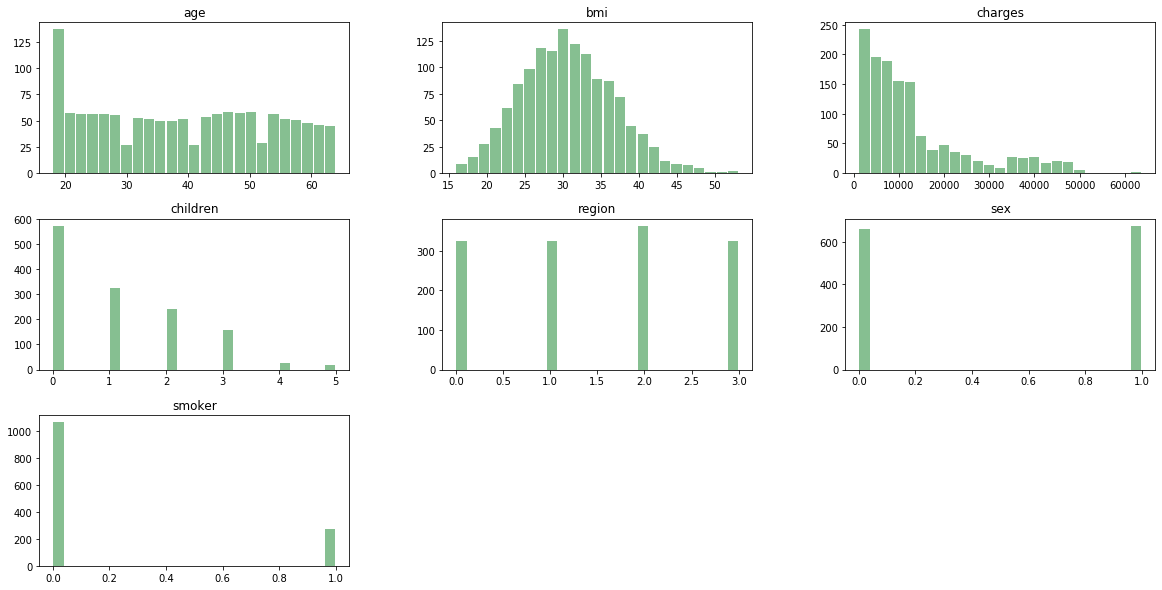

In [80]:
ins_df.hist(bins=25, grid=False, figsize=(20,10), color='#86bf91', zorder=2, rwidth=0.9)

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


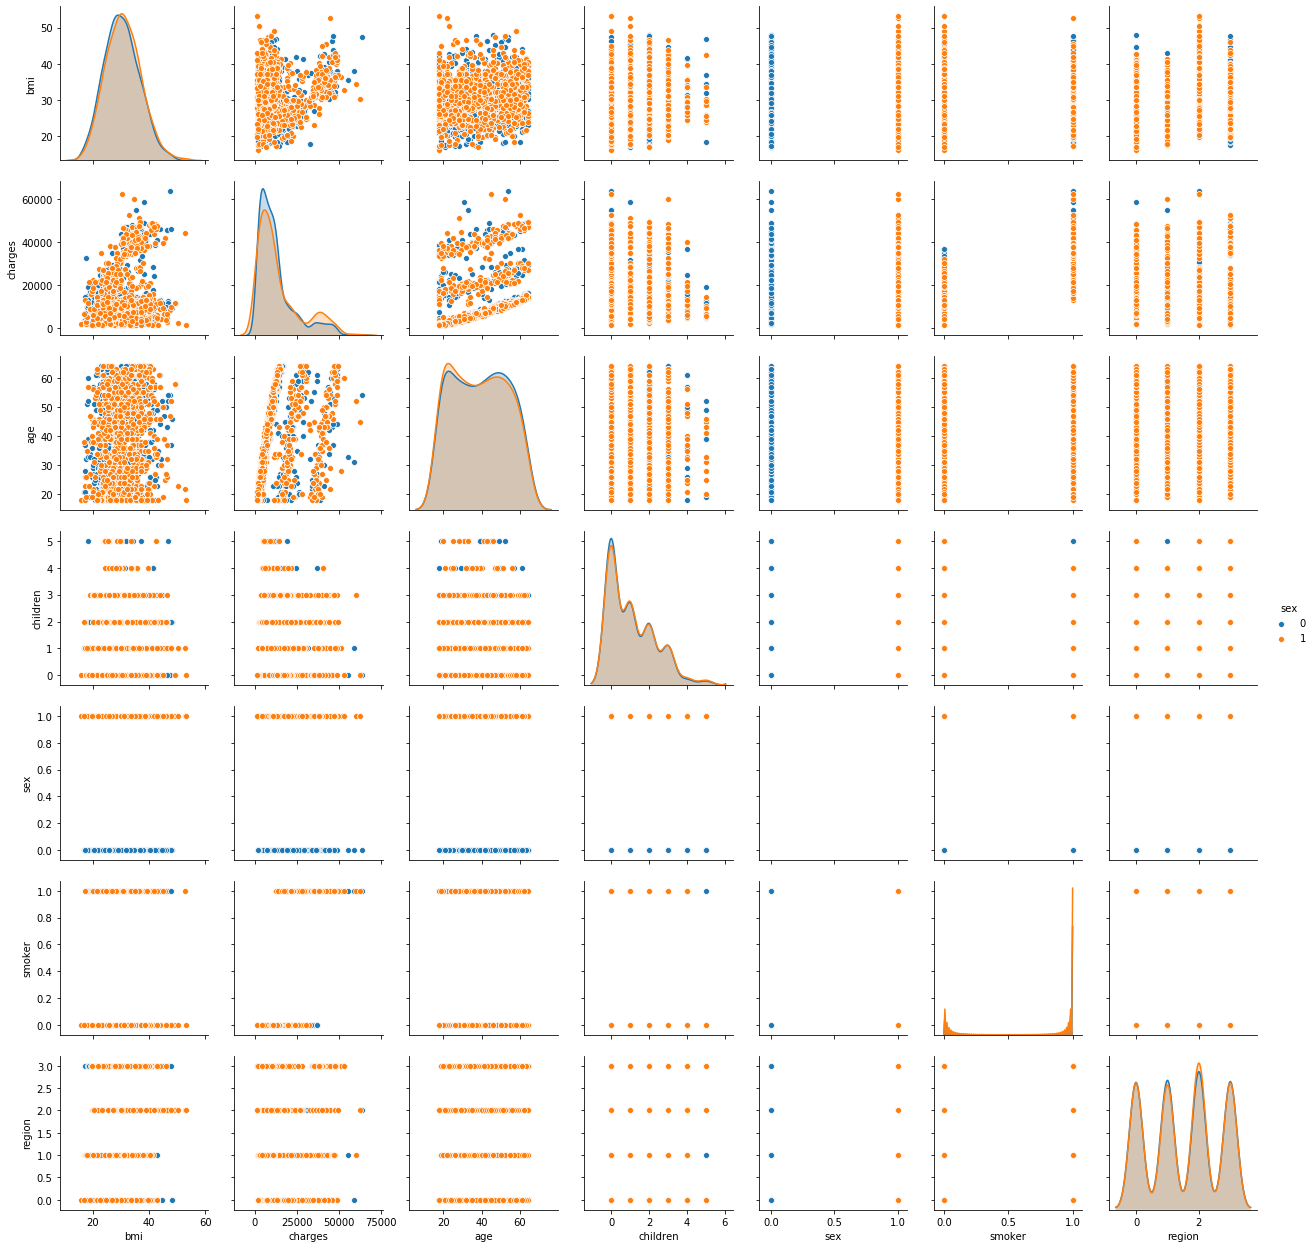

In [85]:

# Create the default pairplot
#sns.pairplot(ins_df)
# Create a pair plot colored by continent with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(ins_df, hue = 'sex', diag_kind = 'kde')

Answer the following questions with statistical evidence
a. Do charges of people who smoke differ significantly from the people who don't?
b. Does bmi of males differ significantly from that of females? 
c. Is the proportion of smokers significantly different in different genders? 
d. Is the distribution of bmi across women with no children, one child and two children, the same ?

a. Do charges of people who smoke differ significantly from the people who don't?

Yes the charges of smoker(0) are comparatively lesser than the charges of non-smoker(1)

b. Does bmi of males differ significantly from that of females? 
Males tend to have a little higher BMI index compared to female but it is not that much significant

c.  Is the proportion of smokers significantly different in different genders? 
No the propertion of smokers does not vary much in both male and female

d. Is the distribution of bmi across women with no children, one child and two children, the same ?
No the distribution of bmi across women does not significantly vary as per the number of children. 
Few females with no children have higher BMI and similarly females with 5 children have lower BMI. 